# Heart Disease Analysis

# Import libraries


Let's first import all the necessary libraries. I'll use numpy and pandas to start with. For visualization, I will use pyplot subpackage of matplotlib,use rcParams to add styling to the plots and rainbow for colors. For implementing Machine Learning models and processing of data, I will use the sklearn library.

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset


Now that we have all the libraries we will need, I can import the dataset and take a look at it. The dataset is stored in the file dataset.csv. I'll use the pandas read_csv method to read the dataset.

In [7]:
df = pd.read_csv('dataset.csv')

The dataset is now loaded into the variable dataset. I'll just take a glimpse of the data using the head() and tail() methods before I actually start processing and visualizing it.

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [10]:
df.shape

(303, 14)

The dataset is now loaded into the variable dataset. I'll just take a glimpse of the data using the desribe() and info() methods before I actually start processing and visualizing it.

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The scale of each feature column is different and quite varied as well. While the maximum for age reaches 77, the maximum of chol (serum cholestoral) is 564

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Looks like the dataset has a total of 303 rows and there are no missing values. There are a total of 13 features along with one target value which we wish to find.

In [13]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no missing values in our data.

In [15]:
dp_val = df.duplicated().any()
print(dp_val)

True


There are duplicates in our dataset, and to drop them we will run the below function

In [16]:
df = df.drop_duplicates()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
df.shape

(302, 14)

All duplicate values are removed from dataset

# Exploring Relationships: Heatmaps With Python For Data Visualization

In [18]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


This tables gives us the varaible and their correlation with the target

# Understanding the data

Now, we can use visualizations to better understand our data and then look at any processing we might want to do.

<Axes: >

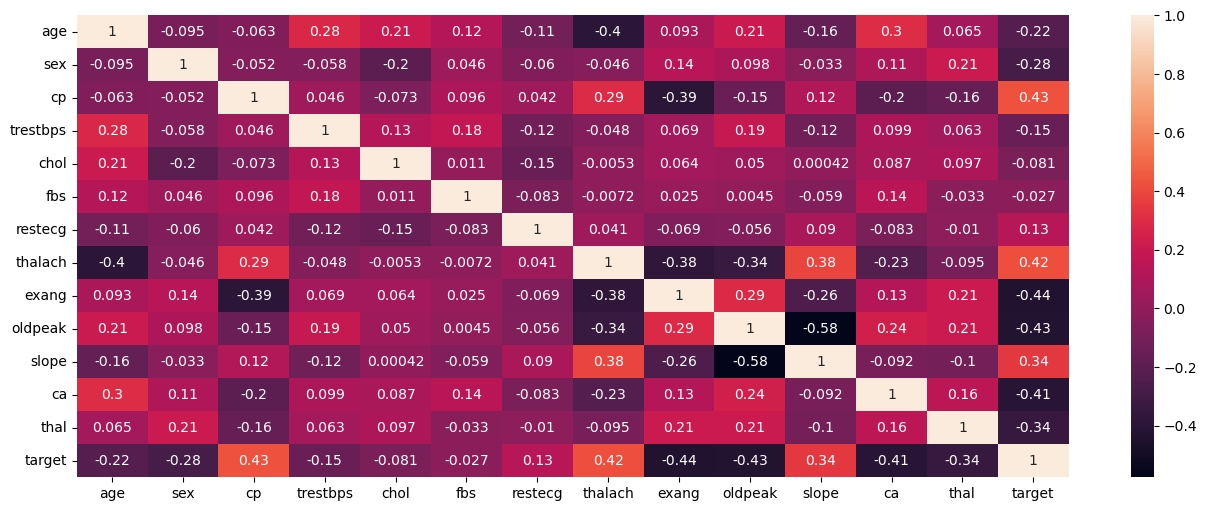

In [21]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),annot = True)

Taking a look at the correlation matrix above, it's easy to see that a few features have negative correlation with the target value while some have positive .

# Numbers Affected and Unaffected by Heart Problems

In [46]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

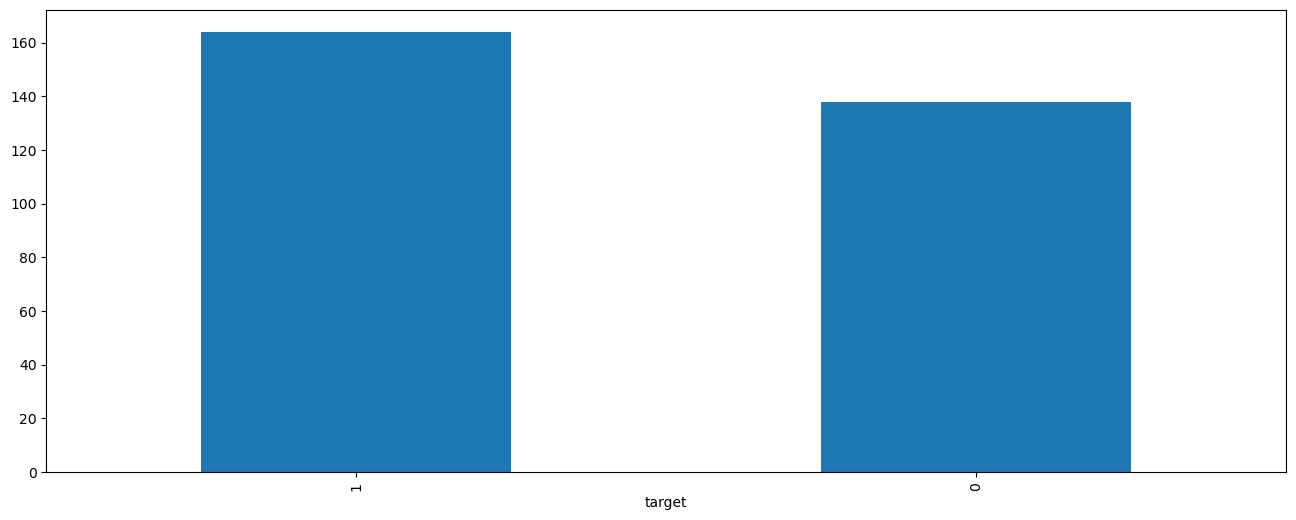

In [65]:
df.value_counts('target').plot(kind='bar')
plt.show()

# Gender Distribution in Dataset

In [52]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

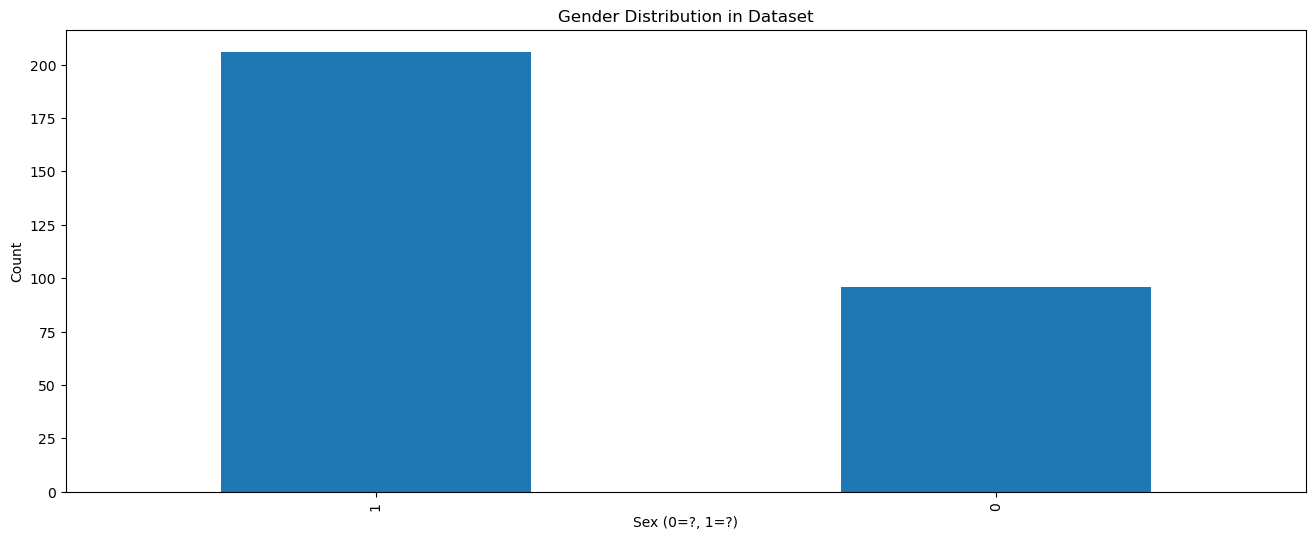

In [93]:
import pandas as pd
import matplotlib.pyplot as plt


gender_counts = df['sex'].value_counts()


gender_counts.plot(kind='bar')
plt.title('Gender Distribution in Dataset')
plt.xlabel('Sex (0=?, 1=?)') 
plt.ylabel('Count')
plt.show()

# Distribution of heart disease among males and females

In [72]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

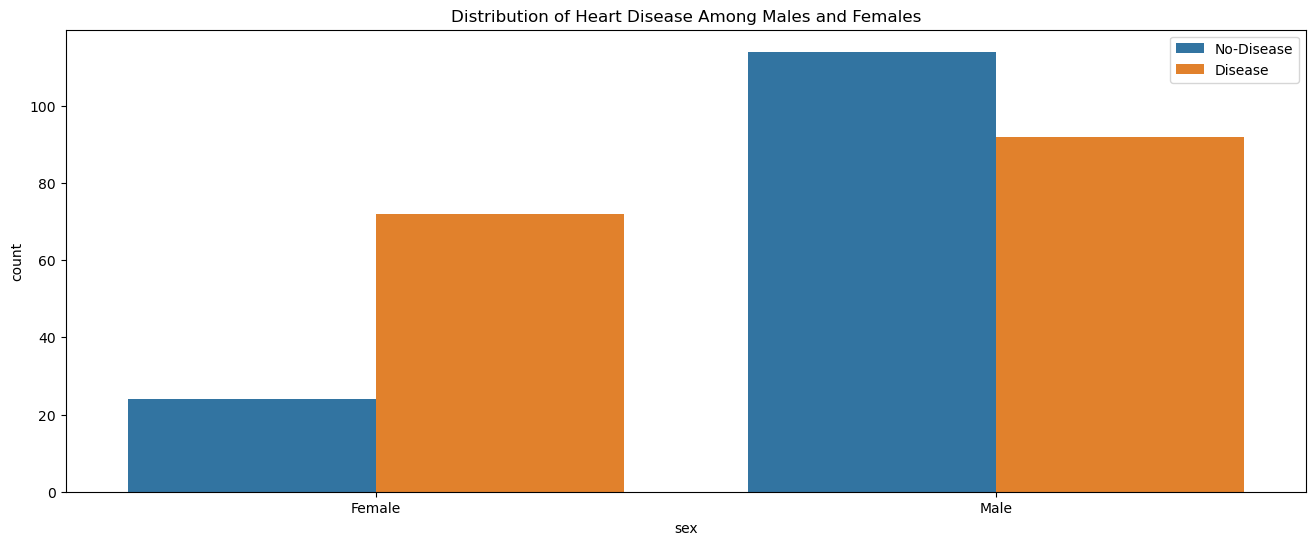

In [79]:
sns.countplot(data = df , x = df ['sex'], hue = df ['target'])
plt.xticks([0,1],['Female','Male'])
plt.title('Distribution of Heart Disease Among Males and Females')
plt.legend(labels = ['No-Disease', 'Disease'])
plt.show()

# Distribution of Ages in our Dataset

In [80]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

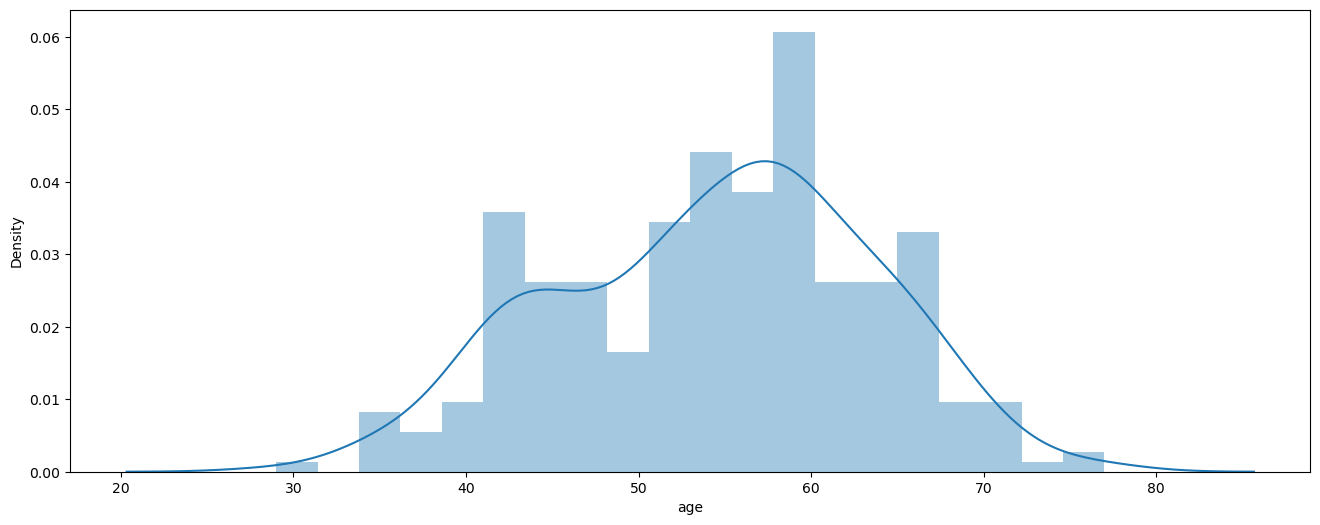

In [81]:
sns.distplot(df['age'],bins = 20)
plt.show()

This chart gives us the visual sense of the age distribution in dataset. Peak curve shows major respondents lie in 50-60 age range

# Chest Pain Types

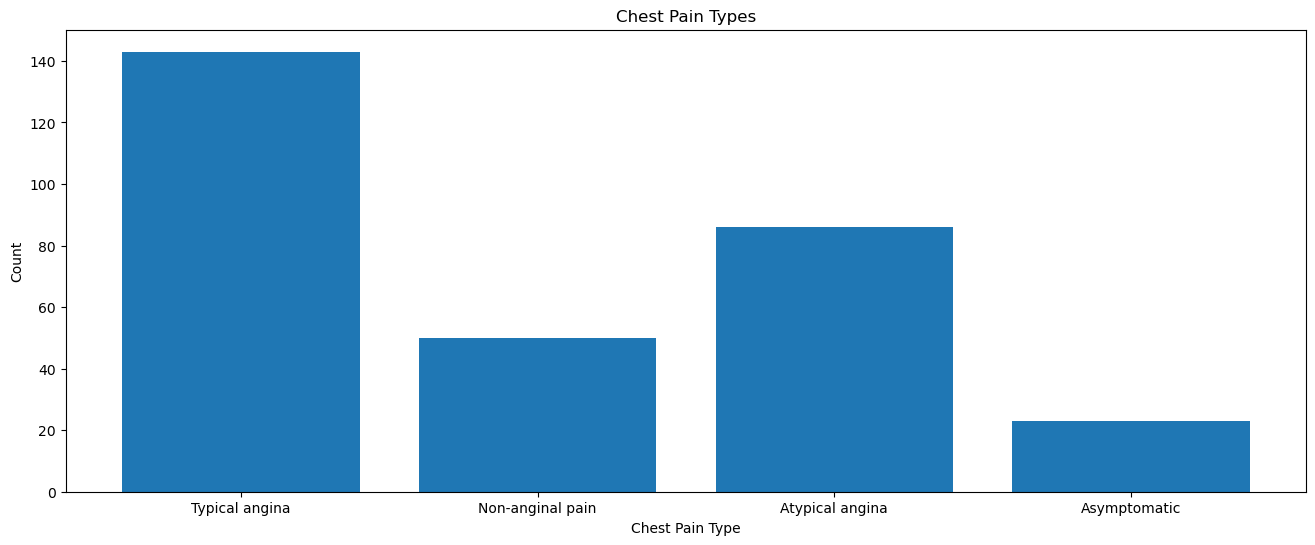

In [91]:
value_counts = df['cp'].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xticks(value_counts.index, ['Typical angina', 'Atypical angina', 'Non-anginal pain', 'Asymptomatic'])
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Chest Pain Types')
plt.show()

0 : Typical Angina - chest pain related to decreased blood supply to the heart 

1 : Atypical Angina - chest pain that is not typical but still could be related to heart 

2 : Non-Anginal Pain - chest pain not relatedto the heart

3 : Asymptomatic - means a person doesn't feel any chest pain. But it doesn't guarantee there's no heart disease. Sometimes, heart issues can be there even if you don't notice any symptoms.

# Chest Pain Distribution in Heart Disease vs Non-Heart Disease

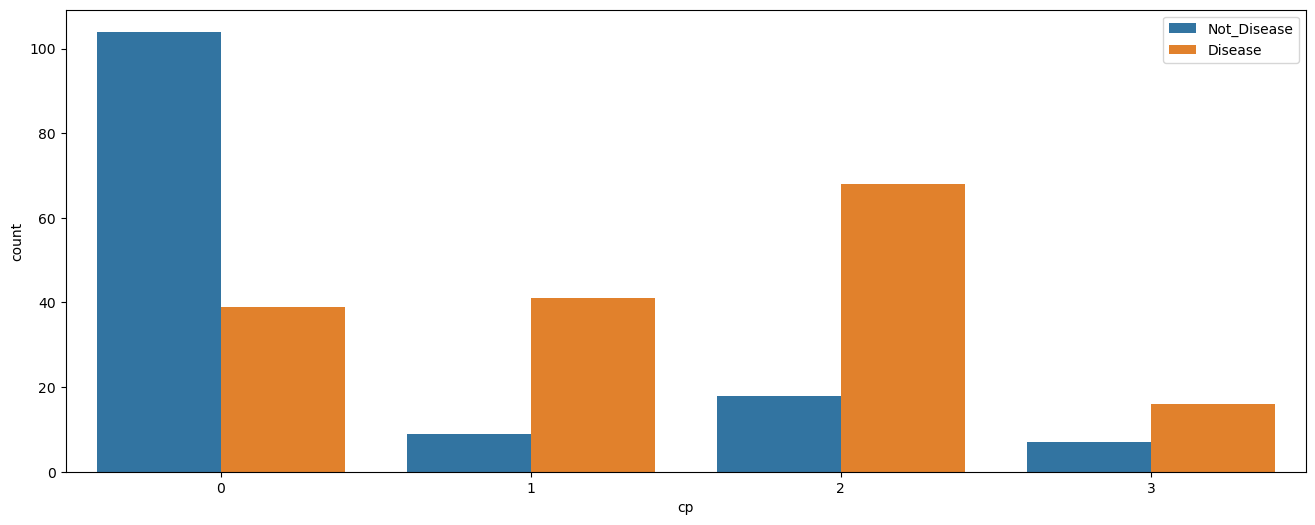

In [84]:
sns.countplot(data = df, x ='cp', hue = 'target')
plt.legend(labels = ["Not_Disease","Disease"])
plt.show()

# Resting Blood Presssure Distribution Overview

In [85]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [86]:
df['trestbps'].hist()

<Axes: >

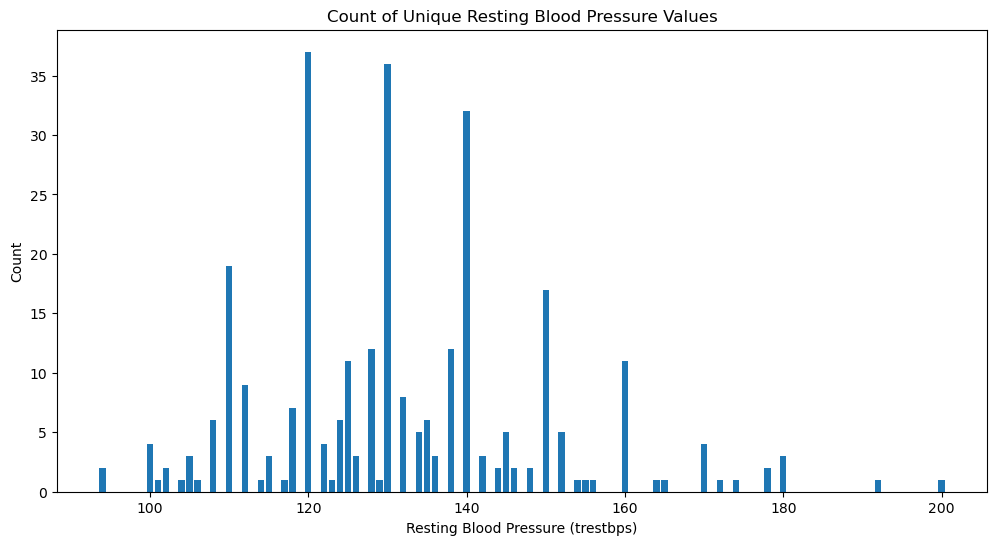

In [88]:
import matplotlib.pyplot as plt
import pandas as pd

trestbps_counts = df['trestbps'].value_counts()
plt.figure(figsize=(12, 6)) 
plt.bar(trestbps_counts.index, trestbps_counts.values)
plt.xlabel('Resting Blood Pressure (trestbps)')
plt.ylabel('Count')
plt.title('Count of Unique Resting Blood Pressure Values')
plt.show()

Normal resting blood pressure is typically below 120/80 mm hg. Higher values may indicate hypertension , a risk factor for heart disease

# Serum Cholesterol (chol) Data Distribution 

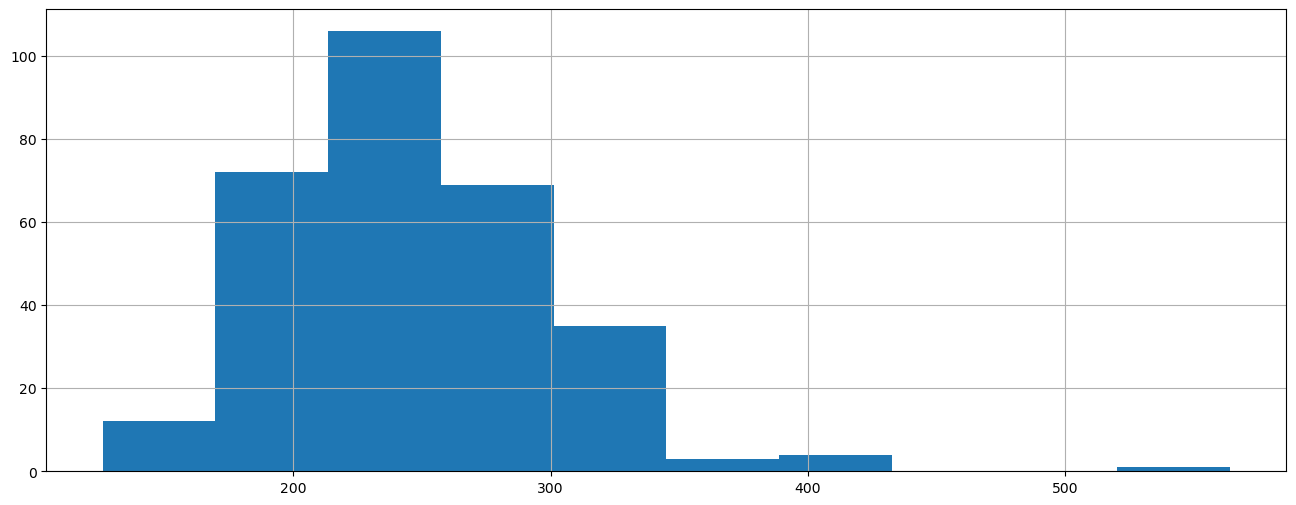

In [89]:
df['chol'].hist()
plt.show()

Desirable total cholesterol is generally below 200 mg/dl. Higher values may increase the risk of heart disease.

# Fasting Blood sugar 

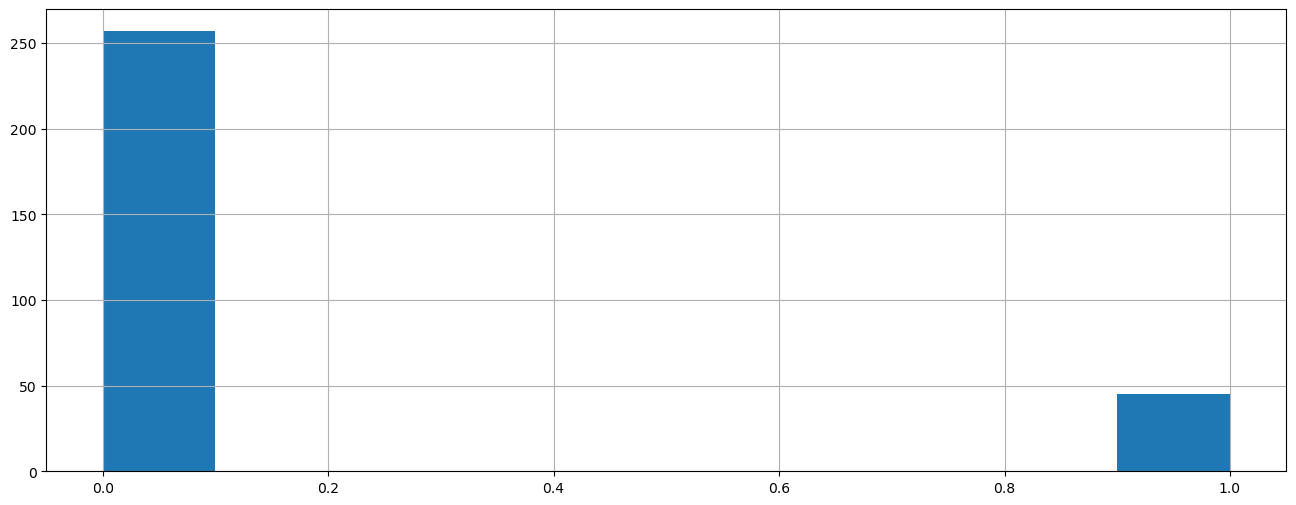

In [90]:
df['fbs'].hist()
plt.show()

A fasting blood sugar level above 120 mg/dl may indicate diabetes or pre-diabetes which are risk factors for heart disease.

Values more than 120/dl = 1

Values less than 120/dl = 0

# Resting Electrocardiographic results 

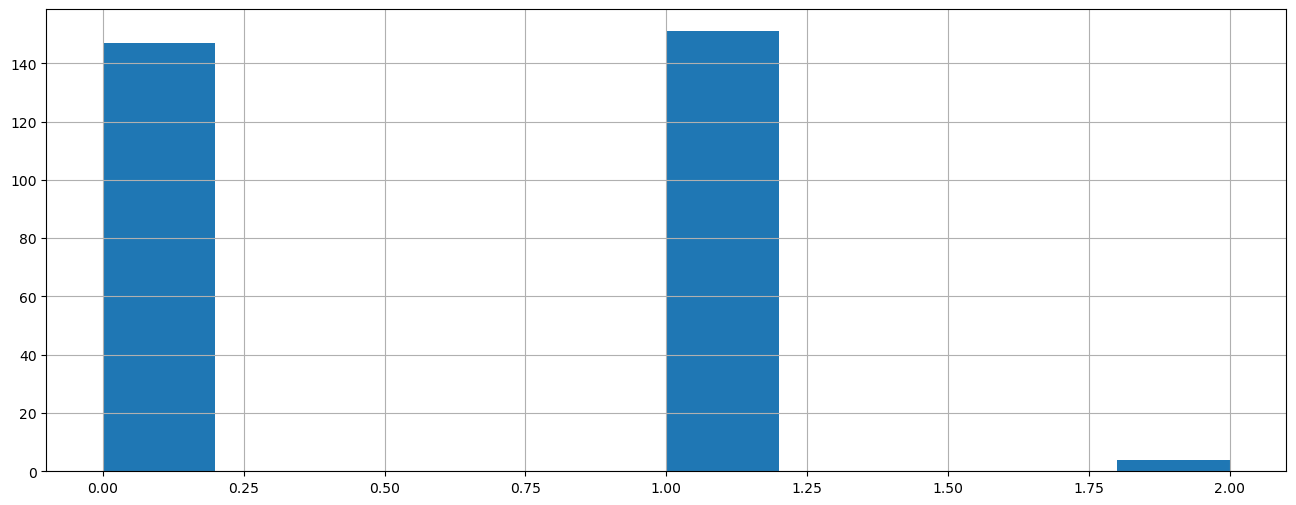

In [92]:
df['restecg'].hist()
plt.show()

0 = Normal

1 = Abnormal ST-T waves on a heart test could mean there are problems with the heart . It's a signal that something might not be right .

2 = Left Ventricular hypertrophy means the hearts left pumping chamber has gotten bigger. It could suggest that the heart has enlarged.

# Maximum heart rate achieved 

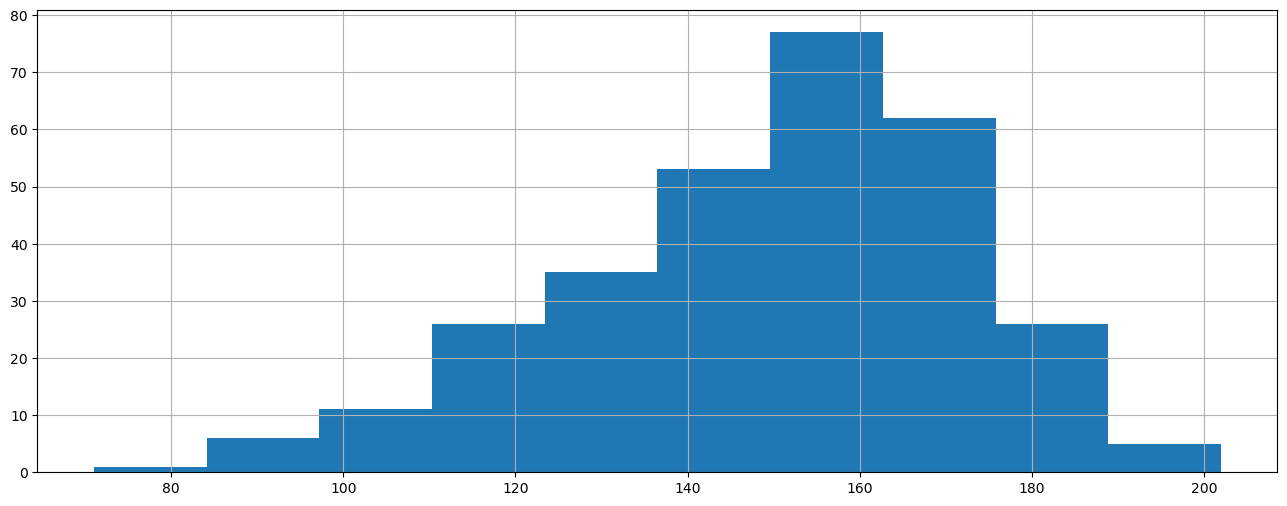

In [97]:
df['thalach'].hist()
plt.show()

The usual heart rate during exercise is around 220 minus your age , if your heart beats much faster or slower during during exercise ,it's something to pay attention to,as it could indicate a concern.

# Exercise Induced Angina 

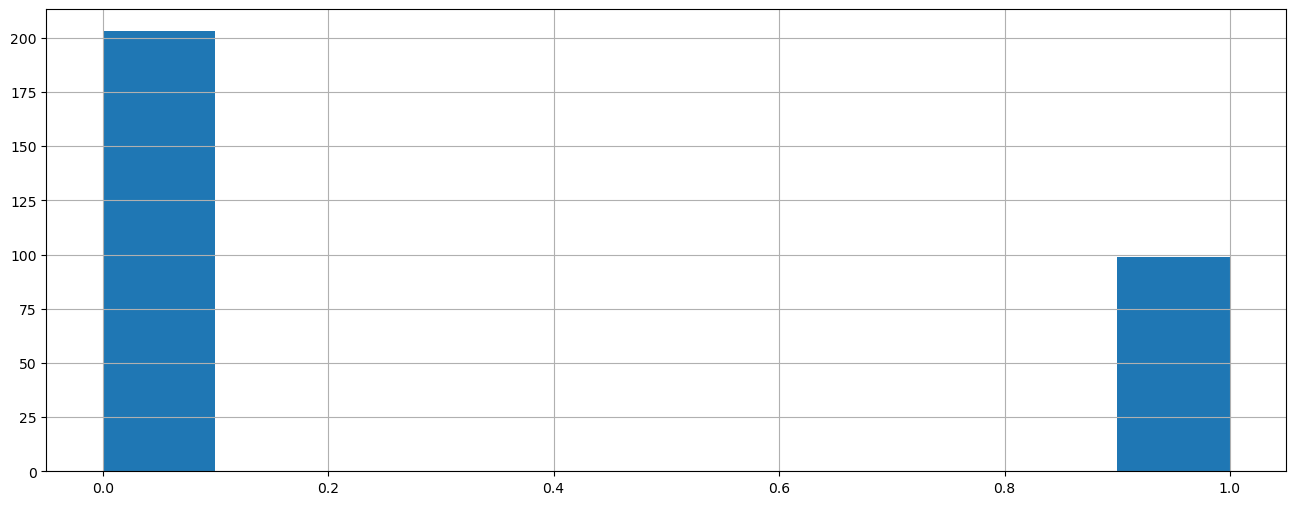

In [98]:
df['exang'].hist()
plt.show()

When it's 1 for exercise enduced angina , it means chest pain happens during physical activity, which might be a sign of heart issues.

When it's 0 there's no angina during exercise, and that's generally considered better.

# ST Depression 

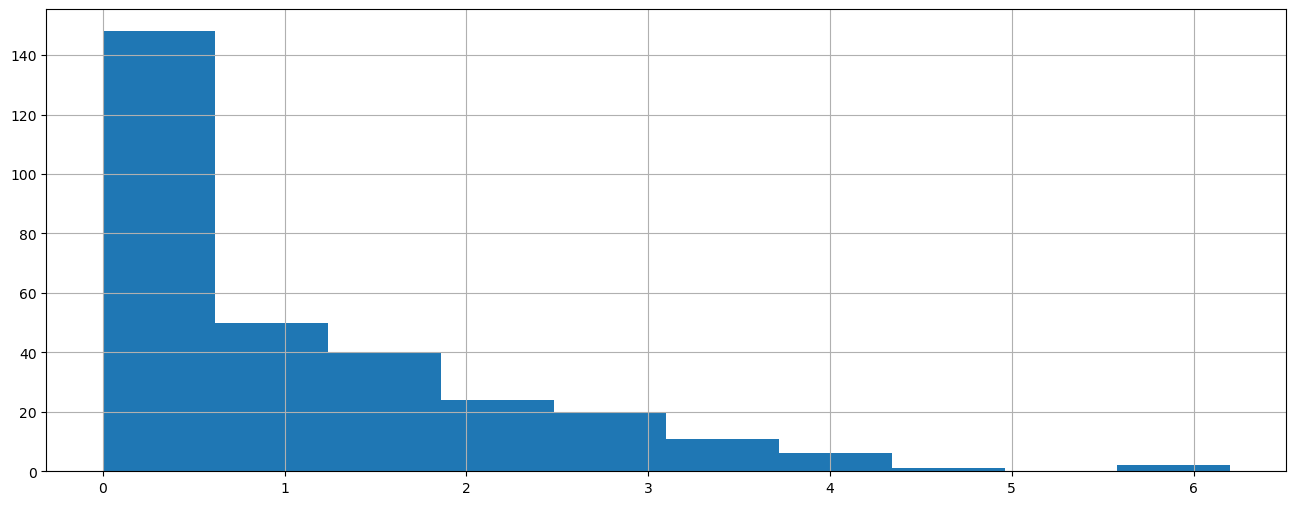

In [100]:
df['oldpeak'].hist()
plt.show()

If the ST Depression number is high, it suggests a greater chance of heart disease. So, the higher the ST depression , the more we might be concerned about the heart's health.

# Slope of ST Segment 

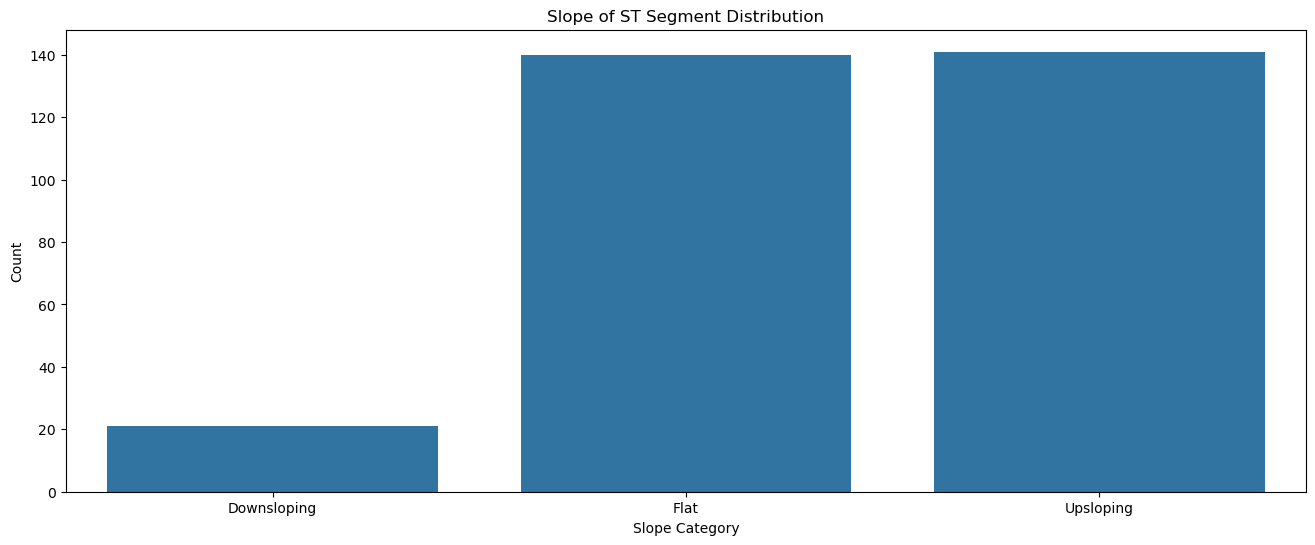

In [109]:
sns.countplot(x='slope', data=df)
plt.title('Slope of ST Segment Distribution')
plt.xlabel('Slope Category')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Downsloping', 'Flat', 'Upsloping'])

plt.show()

When doctors look at your heart activity during exercise, they pay attention to how a specific line on the chart behaves;

Upsloping : A gentle incline is generally okay 

Flat : Staying horizontal might raise some concerns,prompting further checks.

Downsloping : A downward trend could signal potential issues, needing more investigation

# Number of major vessels

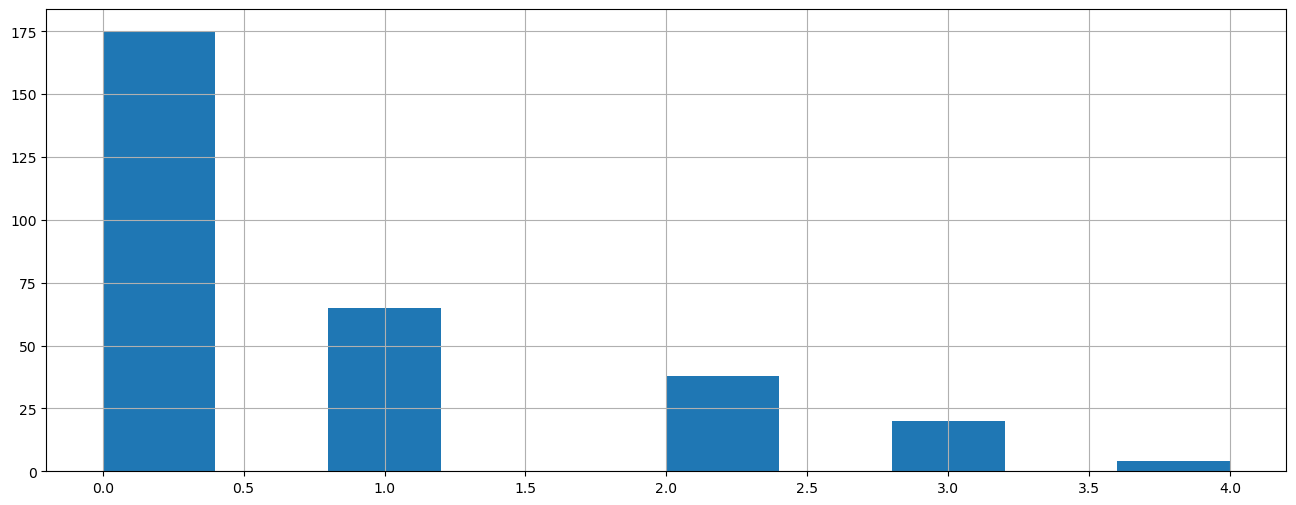

In [102]:
df['ca'].hist()
plt.show()

Doctors use a special camera test called fluoroseopy to check your heart's blood vessels, if they notice more colored areas during this test , it could suggest a greater chance of having heart disease. It's like a sign that the blood vessels in your heart may not be as healthy as they need to be.

# Thallium Stress Test Result

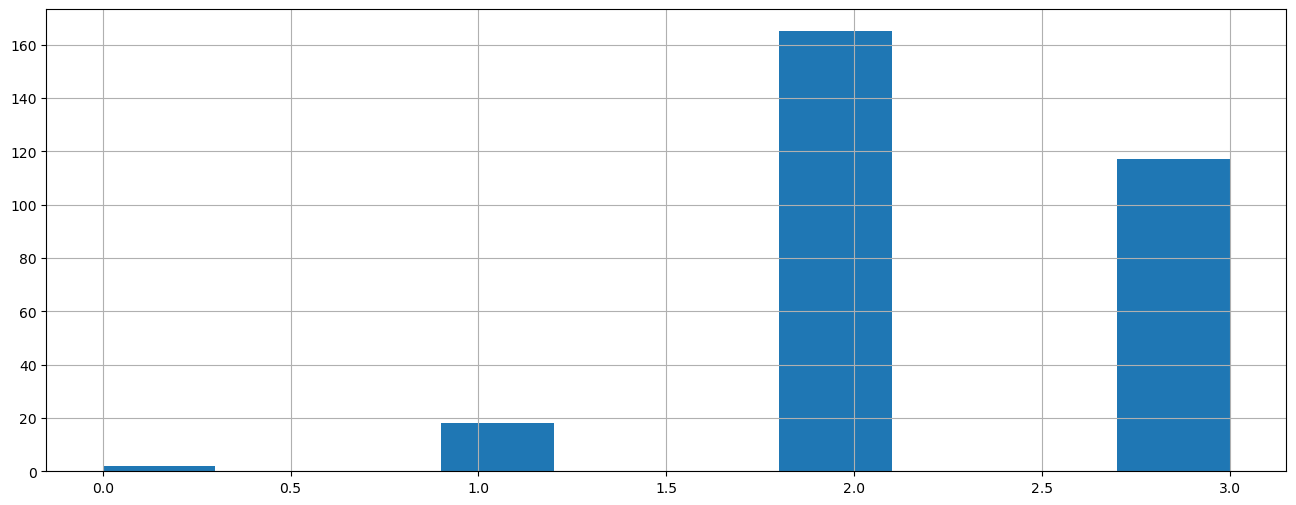

In [104]:
df['thal'].hist()
plt.show()

1 = Normal, 

2 = Fixed defect-No blood flow in some part of the heart,

3 = Reversible defect-Blood flow is observed, but it is not normal

# Target 

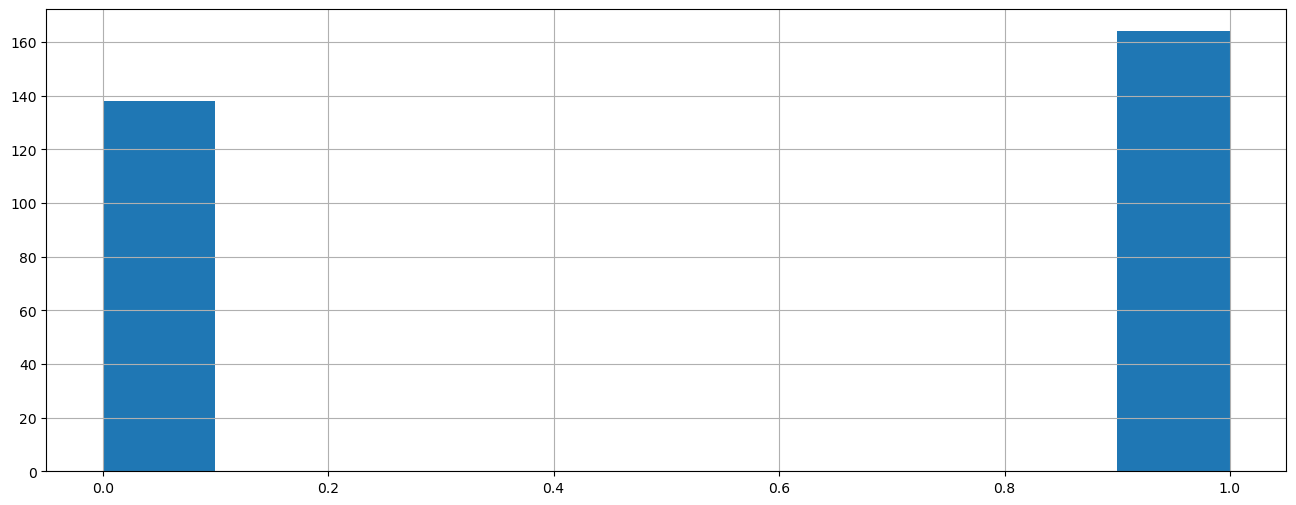

In [106]:
df['target'].hist()
plt.show()

0 = Absence of Heart Disease
1 = Presence of Heart Disease